In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
data= pd.read_csv("/content/fralitydataset.csv")
data.head()

,Height,Weight,Age,Grip strength,Frailty
0,65.8,112,30,30,N
1,71.5,136,19,31,N
2,69.4,153,45,29,N
3,68.2,142,22,28,Y
4,67.8,144,29,24,Y


In [11]:
data.columns = data.columns.str.strip()


In [13]:
print(data.columns)


Index(['Height', 'Weight', 'Age', 'Grip  strength', 'Frailty'], dtype='object')


In [16]:
data.rename(columns={'Grip strength': 'Grip_strength'}, inplace=True)


In [17]:
data.columns

Index(['Height', 'Weight', 'Age', 'Grip  strength', 'Frailty'], dtype='object')

In [18]:
# Rechecking for missing values with correct column names
missing_values_final = data.isnull().sum()

# Summary statistics for numerical variables, with correct column names
summary_statistics_final = data.describe()

# Checking for outliers in "Grip  strength" with correct column name
grip_outliers_final = data['Grip  strength'].describe(percentiles=[.25, .5, .75, .95])

missing_values_final, summary_statistics_final, grip_outliers_final


(Height            0
 Weight            0
 Age               0
 Grip  strength    0
 Frailty           0
 dtype: int64,
           Height      Weight        Age  Grip  strength
 count  10.000000   10.000000  10.000000       10.000000
 mean   68.600000  131.900000  32.500000       26.000000
 std     1.670662   14.231811  12.860361        4.521553
 min    65.800000  112.000000  17.000000       19.000000
 25%    67.825000  120.750000  22.250000       22.500000
 50%    68.450000  136.000000  29.500000       27.000000
 75%    69.700000  141.750000  43.500000       29.750000
 max    71.500000  153.000000  51.000000       31.000000,
 count    10.000000
 mean     26.000000
 std       4.521553
 min      19.000000
 25%      22.500000
 50%      27.000000
 75%      29.750000
 95%      31.000000
 max      31.000000
 Name: Grip  strength, dtype: float64)

In [21]:
# Convert 'Frailty' from N/Y to 0/1 for easier analysis
data['Frailty_numeric'] = data['Frailty'].map({'N': 0, 'Y': 1})
data.head()

,Height,Weight,Age,Grip strength,Frailty,Frailty_numeric
0,65.8,112,30,30,N,0
1,71.5,136,19,31,N,0
2,69.4,153,45,29,N,0
3,68.2,142,22,28,Y,1
4,67.8,144,29,24,Y,1


Text(0.5, 1.02, 'Pairplot of Variables by Frailty Status')

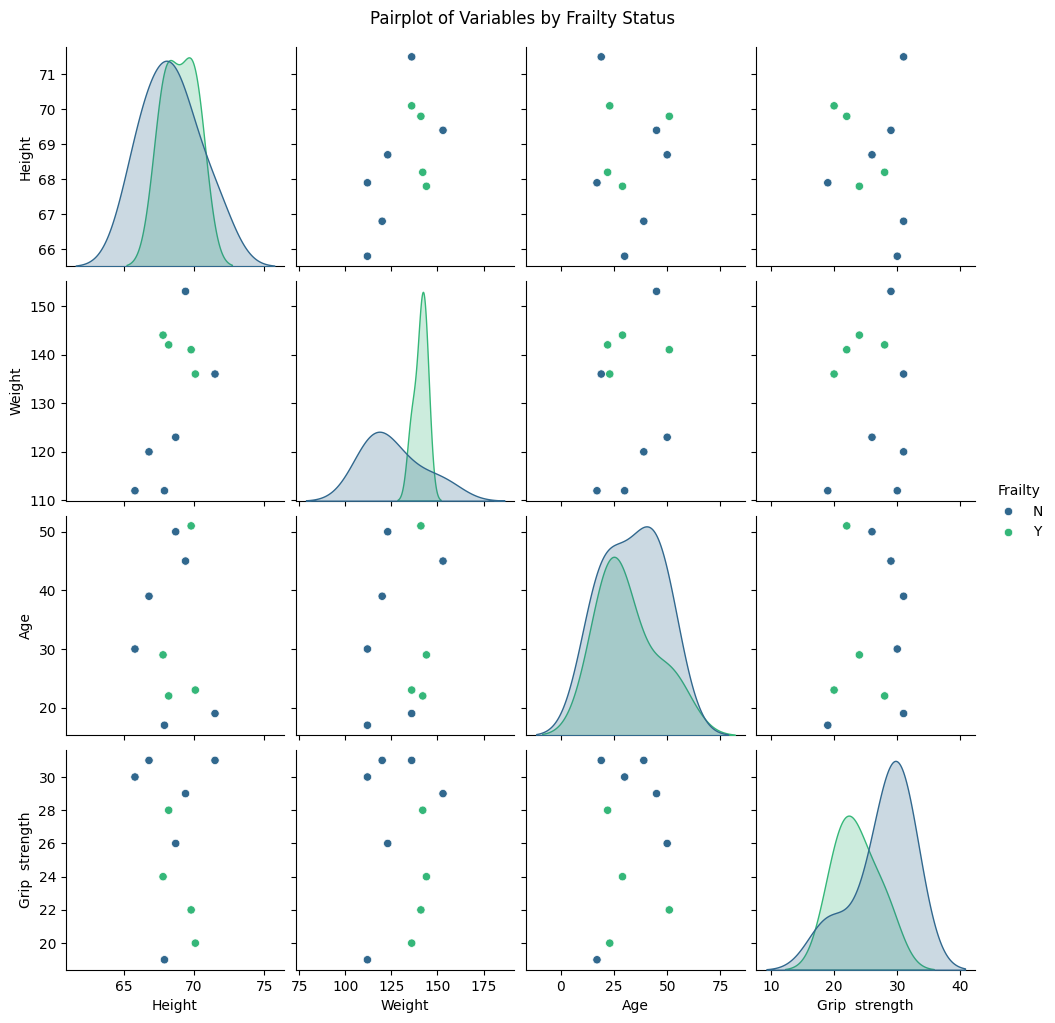

In [25]:
# Visualization: Pairplot to visualize the distribution of and relationships between variables
sns.pairplot(data, vars=['Height', 'Weight', 'Age', 'Grip  strength'], hue='Frailty', palette='viridis')
plt.suptitle('Pairplot of Variables by Frailty Status', y=1.02)

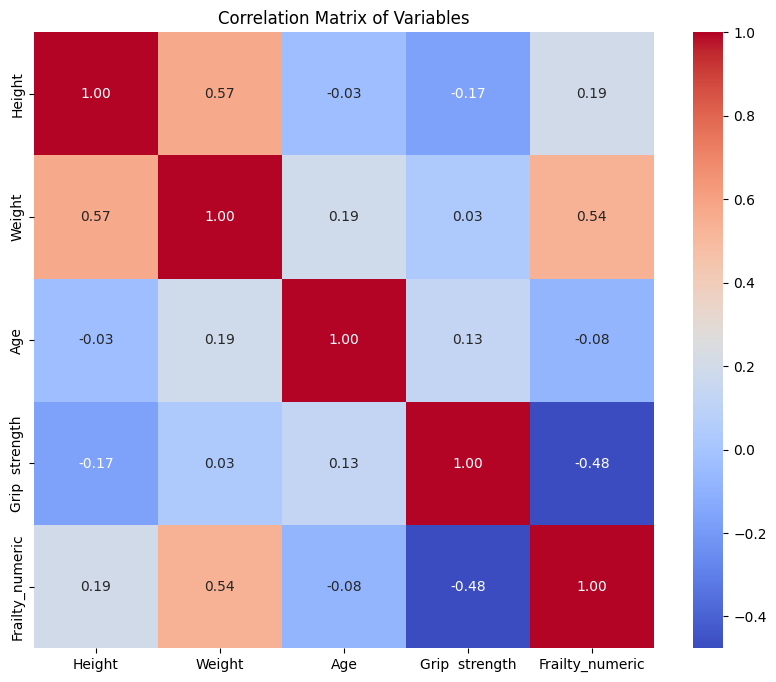

(None,
                    Height    Weight       Age  Grip  strength  Frailty_numeric
 Height           1.000000  0.571525 -0.032580       -0.167682         0.193186
 Weight           0.571525  1.000000  0.190926        0.032807         0.535200
 Age             -0.032580  0.190926  1.000000        0.133756        -0.083655
 Grip  strength  -0.167682  0.032807  0.133756        1.000000        -0.475867
 Frailty_numeric  0.193186  0.535200 -0.083655       -0.475867         1.000000)

In [29]:
# Correlation matrix to see relationships between all numerical variables
correlation_matrix = data[['Height', 'Weight', 'Age', 'Grip  strength', 'Frailty_numeric']].corr()
# Show correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Variables')

plt.show(), correlation_matrix


In [31]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [33]:
# Selecting predictors and response variables
X = data[['Grip  strength', 'Weight']]  # Predictor variables
y = data['Frailty_numeric']  # Response variable

# Add a constant term to the predictor
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Frailty_numeric   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     3.949
Date:                Tue, 13 Feb 2024   Prob (F-statistic):             0.0711
Time:                        04:01:43   Log-Likelihood:                -3.2769
No. Observations:                  10   AIC:                             12.55
Df Residuals:                       7   BIC:                             13.46
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.7722      1.444     -0.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
